In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.porter import PorterStemmer

In [3]:
import pandas as pd  
df = pd.read_pickle('data/featured_recipes.pkl')  

In [4]:
df.head()

,id,post_date,title,foods,food_stems
0,27,2018-02-09,Long Life Noodles with Shrimp and Greens,"teaspoon sesame oil, for drizzling stalk green...","[sesam, oil, stalk, onion, carrot, stalk, onio..."
1,28,2018-02-09,Ginger-Onion Whole Steamed Fish,"stalks green onions, cut into 3-inch segments,...","[stalk, onion, segment, wine, marsala, wine, o..."
2,29,2018-02-09,Smacked Cucumber,"teaspoon sugar cloves garlic, crushed tablespo...","[sugar, clove, flake, chili, cucumb, cucumb, v..."
3,30,2018-02-08,Neck Bones and Lima Beans,"salt and pepper, to taste tablespoons canola o...","[oil, sage, lima, bean, water, nutmeg, onion, ..."
4,31,2018-02-07,Angel Wings (Faworki),pinch sea salt confectioner’s sugar for servin...,"[sea, confection, cream, egg, yolk, powder, co..."


In [62]:
def yearly_food_plot(df, food, path=None, save=False):
    porter = PorterStemmer()
    food_stem = porter.stem(food.lower())
    dates = df.loc[[i for i in df.index if food_stem in df.loc[i, 'food_stems']], ['id', 'post_date']]
    dates.index = dates['post_date']
    dates['food_counts'] = np.ones(len(dates))

    dates_all = df[['id', 'post_date']]
    dates_all.index = dates_all['post_date']
    dates_all['total_counts'] = np.ones(len(dates_all))

    months = np.array(range(1, 13))
    mo_counts = np.zeros((len(range(2009, 2018)), len(months)))
    mo_counts_all = np.zeros((len(range(2009, 2018)), len(months)))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for i, year in enumerate(range(2009, 2018)):
        year = str(year)
        d1 = dates[year].resample('1M').sum()
        d2 = dates_all[year].resample('1M').sum()
        counts = d1[['food_counts']].join(d2[['total_counts']], how='left')
        counts.fillna(0, inplace=True)
        counts['percentage'] = counts['food_counts'] / counts['total_counts']
        counts['mos'] = [date.month for date in counts['food_counts'].index]
        mo_counts[i][counts['mos'] -1] = counts['percentage']
        ax.plot(months, mo_counts[i],
            linewidth=2,
            color=plt.cm.cool(10 + i*30),
            alpha=0.3,
            label=year)
             
    avg_counts = np.mean(mo_counts, axis=0)
    ax.plot(months, avg_counts, linewidth=4, color='blue')
    ax.set_xlim([0, 15])
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_title('Average Yearly Popularity of {}'.format(food))
    ax.set_xlabel('Month')
    ax.legend()
    if save:
        fig.savefig(path)
    return mo_counts


/Users/lizberg/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


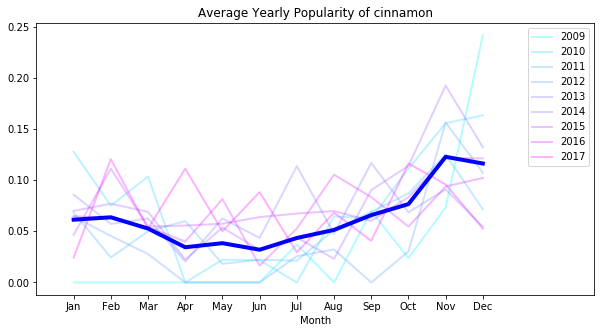

In [65]:
mo_counts = yearly_food_plot(df, 'cinnamon')

In [57]:
mo_counts

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02325581,  0.11904762,
         0.        ,  0.17241379],
       [ 0.04255319,  0.025     ,  0.05172414,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04444444,  0.08163265],
       [ 0.04545455,  0.24390244,  0.025     ,  0.06      ,  0.01818182,
         0.11111111,  0.        ,  0.02564103,  0.        ,  0.13043478,
         0.        ,  0.07142857],
       [ 0.        ,  0.22727273,  0.        ,  0.12      ,  0.        ,
         0.08108108,  0.        ,  0.06451613,  0.03448276,  0.        ,
         0.0625    ,  0.07142857],
       [ 0.02857143,  0.05714286,  0.0625    ,  0.04081633,  0.10416667,
         0.06521739,  0.04545455,  0.06349206,  0.01666667,  0.08219178,
         0.03030303,  0.14545455],
       [ 0.0483871 ,  0.06153846,  0.12068966,  0.02985075,  0.04464286,
         0.01587302,  

In [59]:
avg_counts = np.mean(mo_counts, axis=0)
avg_counts

array([ 0.06358307,  0.08426389,  0.04560527,  0.05019758,  0.03124786,
        0.05546441,  0.02801657,  0.04643861,  0.03692281,  0.08629321,
        0.06517546,  0.11379033])

In [47]:
food = 'chocolate'
porter = PorterStemmer()
food_stem = porter.stem(food.lower())
dates = df.loc[[i for i in df.index if food_stem in df.loc[i, 'food_stems']], ['id', 'post_date']]
dates.index = dates['post_date']
dates['food_counts'] = np.ones(len(dates))

dates_all = df[['id', 'post_date']]
dates_all.index = dates_all['post_date']
dates_all['total_counts'] = np.ones(len(dates_all))

months = np.array(range(1, 13))
mo_counts = np.zeros((len(range(2009, 2018)), len(months)))
mo_counts_all = np.zeros((len(range(2009, 2018)), len(months)))

for i, year in enumerate(range(2009, 2018)):
    year = str(year)
    d1 = dates[year].resample('1M').sum()
    d2 = dates_all[year].resample('1M').sum()
    counts = d1[['food_counts']].join(d2[['total_counts']], how='left')
    counts.fillna(0, inplace=True)
    counts['percentage'] = counts['food_counts'] / counts['total_counts']
    counts['mos'] = [date.month for date in counts['food_counts'].index]
    mo_counts[i][counts['mos'] -1] = counts['percentage']

/Users/lizberg/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
mo_counts

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02325581,  0.11904762,
         0.        ,  0.17241379],
       [ 0.04255319,  0.025     ,  0.05172414,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04444444,  0.08163265],
       [ 0.04545455,  0.24390244,  0.025     ,  0.06      ,  0.01818182,
         0.11111111,  0.        ,  0.02564103,  0.        ,  0.13043478,
         0.        ,  0.07142857],
       [ 0.        ,  0.22727273,  0.        ,  0.12      ,  0.        ,
         0.08108108,  0.        ,  0.06451613,  0.03448276,  0.        ,
         0.0625    ,  0.07142857],
       [ 0.02857143,  0.05714286,  0.0625    ,  0.04081633,  0.10416667,
         0.06521739,  0.04545455,  0.06349206,  0.01666667,  0.08219178,
         0.03030303,  0.14545455],
       [ 0.0483871 ,  0.06153846,  0.12068966,  0.02985075,  0.04464286,
         0.01587302,  

In [30]:
d1

,id,food_counts
post_date,,
2009-09-30,4781.0,1.0
2009-10-31,23718.0,5.0
2009-11-30,NaN,NaN
2009-12-31,23387.0,5.0


In [31]:
d2

,id,total_counts
post_date,,
2009-06-30,39044,8.0
2009-07-31,131301,27.0
2009-08-31,169120,35.0
2009-09-30,206099,43.0
2009-10-31,199521,42.0
2009-11-30,193069,41.0
2009-12-31,135546,29.0


In [41]:
d1.join?